# Phantom Power Draw Data Collection
- location: Leslie eLab
- start date: 2015-03-25
- devices:
    + 1: White Hitachi Projector in Lean
    + 2: N/A
    + 3: Black Vaddio Camera in Lean
    + 4: N/A
    + 5: N/A
    + 6: Printer in Main Room

In [1]:
# Imports
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.__version__

Populating the interactive namespace from numpy and matplotlib


'0.15.2'

In [2]:
# Read in data from csv file.
columns = ["time", "sensor", "power"]
path = "data.csv"
dateparse = lambda x: pd.datetime.fromtimestamp(float(x))
data = pd.read_csv(path, names=columns, parse_dates=[0], date_parser=dateparse, index_col='time')

In [3]:
data.head()

,sensor,power
time,,
2015-03-25 13:40:17.490000,WeMo6,19910
2015-03-25 13:48:20.329999,WeMo6,21155
2015-03-25 13:48:20.640000,WeMo1,205715
2015-03-25 13:48:20.930000,WeMo3,11065
2015-03-25 13:48:21.240000,WeMo6,21175


In [4]:
# convert milliwatts into watts
data['power'] /= 1000
groups = data.groupby(data.sensor)

sensor
WeMo1     Axes(0.125,0.2;0.775x0.7)
WeMo3     Axes(0.125,0.2;0.775x0.7)
WeMo6     Axes(0.125,0.2;0.775x0.7)
dtype: object

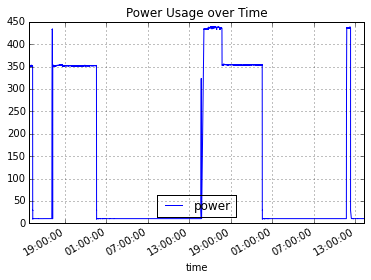

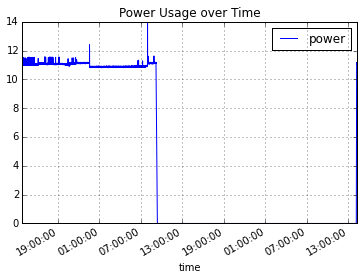

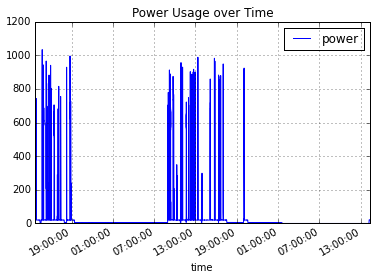

In [5]:
groups.plot(title="Power Usage over Time")

## Project Notes
Adam Cragg, the manager of the Entrepreneurship Lab, noted that the printer and camera had power issues. Both devices were found powered off Thursday morning, even though no `power off` commmands had been sent to the attached Wemos.

During installation, the sensors required that they connect to the router before allowing power to get to the attached device, frustrating Adam. On average, to install a sensor, it took 5 to 10 minutes. All of the sensors had connectivity issues.

## What was the time between samples?
Was the time between samples consistent? Is it correlated with the sensor_id?

In [6]:
# http://stackoverflow.com/questions/16777570/calculate-time-difference-between-pandas-dataframe-indices
data['tvalue'] = data.index
data['delta'] = (data['tvalue']-data['tvalue'].shift()).fillna(0)
data.head()

,sensor,power,tvalue,delta
time,,,,
2015-03-25 13:40:17.490000,WeMo6,19.910,2015-03-25 13:40:17.490000,00:00:00
2015-03-25 13:48:20.329999,WeMo6,21.155,2015-03-25 13:48:20.329999,00:08:02.839999
2015-03-25 13:48:20.640000,WeMo1,205.715,2015-03-25 13:48:20.640000,00:00:00.310001
2015-03-25 13:48:20.930000,WeMo3,11.065,2015-03-25 13:48:20.930000,00:00:00.290000
2015-03-25 13:48:21.240000,WeMo6,21.175,2015-03-25 13:48:21.240000,00:00:00.310000


In [7]:
# convert to seconds
data['deltasecs'] = data['delta'].apply(lambda x: x / np.timedelta64(1, 's'))
data['deltasecs'].describe()

count    314253.000000
mean          0.556883
std           4.357785
min           0.000000
25%           0.300000
50%           0.309999
75%           0.320000
max        1221.130001
Name: deltasecs, dtype: float64

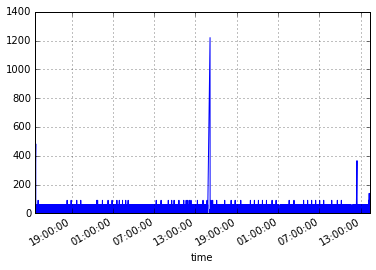

In [8]:
data['deltasecs'].plot()

In [9]:
# plot based on sensors
groups = data.groupby(data.sensor)
groups.describe()

delta      deltasecs          power
sensor                                                            
WeMo1  count                  105633  105633.000000  105633.000000
       mean   0 days 00:00:00.528357       0.528357     126.227146
       std    0 days 00:00:05.057689       5.057689     168.553061
       min    0 days 00:00:00.279999       0.279999       9.445000
       25%    0 days 00:00:00.310000       0.310000      10.770000
       50%    0 days 00:00:00.319999       0.319999      10.800000
       75%    0 days 00:00:00.329999       0.329999     352.020000
       max    0 days 00:20:21.130001    1221.130001     438.945000
WeMo3  count                  104493  104493.000000  104493.000000
       mean   0 days 00:00:00.488375       0.488376       4.652073
       std    0 days 00:00:03.457478       3.457479       5.436153
       min    0 days 00:00:00.269999       0.269999       0.000000
       25%    0 days 00:00:00.299999       0.299999       0.000000
       50%    0 days 00:00:00.300000       0.300000       0.000000
       75%    0 days 00:00:00.310000       0.310000      10.910000
       max    0 days 00:06:06.480000     366.480000      13.885000
WeMo6  count                  104127  104127.000000  104127.000000
       mean   0 days 00:00:00.654567       0.654568      16.282614
       std    0 days 00:00:04.399000       4.399001      71.542312
       min           0 days 00:00:00       0.000000       0.000000
       25%    0 days 00:00:00.299999       0.299999       0.000000
       50%    0 days 00:00:00.300001       0.300001       5.555000
       75%    0 days 00:00:00.310001       0.310001      19.935000
       max    0 days 00:08:02.839999     482.839999    1034.680000

As we can see from the above table, WeMo1 had the best performance in terms of sensor latency (`deltasecs`) and in terms of the number of samples (`count` in the above table).

WeMo1 and WeMo3 were in the same room, only 5 or so feet apart.

sensor
WeMo1     Axes(0.125,0.2;0.775x0.7)
WeMo3     Axes(0.125,0.2;0.775x0.7)
WeMo6     Axes(0.125,0.2;0.775x0.7)
dtype: object

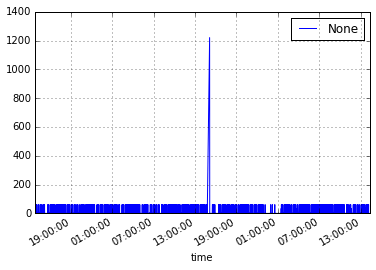

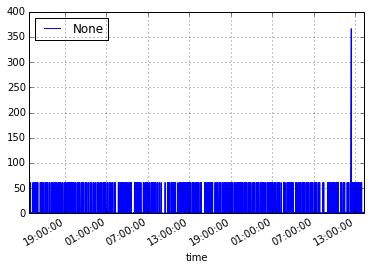

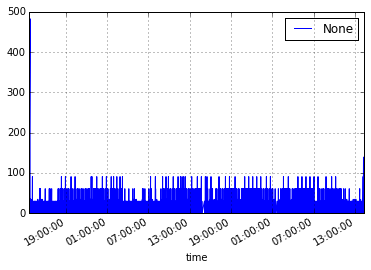

In [10]:
groups.plot(y='deltasecs')

In [11]:
def outliers(ε=3):
    """Remove outliers more than ε standard deviations away."""
    outlier_threshold = ε*data['deltasecs'].std()
    outliers = data[(data['deltasecs']-data['deltasecs'].mean()).abs()>outlier_threshold]
    return outliers.groupby(outliers.sensor)

outliers(13).count()

,power,tvalue,delta,deltasecs
sensor,,,,
WeMo1,325,325,325,325
WeMo3,301,301,301,301
WeMo6,268,268,268,268
